In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error




In [54]:
data_0 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv")
data_1 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv")
data_2 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv")

In [55]:
print(data_0.info())
display(data_0.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
81265,3hdgr,1.663919,-0.394216,0.344920,79.802455
41467,8TPQe,0.669357,0.689511,0.080266,30.262713
89864,is4Nj,1.954142,0.375812,4.704672,120.545094
7345,vZKCN,1.894104,0.097650,3.357440,37.639497
76494,dDUY1,1.082612,0.121679,5.130264,39.020847


In [56]:
print(data_1.info())
display(data_1.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
61520,dBcIf,4.102617,-0.442918,1.002483,26.953261
86698,UnQO7,-2.120267,-9.454661,5.002251,134.766305
96301,oiWyc,-11.835664,-3.955107,0.000743,3.179103
86620,Yk5mR,2.814999,4.187698,1.998191,53.906522
33459,a7c91,17.597239,-8.188905,0.994331,26.953261


In [57]:
print(data_2.info())
display(data_2.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
94602,MwEty,0.923132,-1.555092,7.847978,99.102804
44356,9wVMl,-0.021890,1.992576,-1.081226,100.142293
83465,Ep5hE,1.336429,2.048135,3.728917,101.881190
96732,2k44Q,-0.472407,1.395448,-2.544839,63.529504
89894,aoIcL,2.412278,3.139602,8.688684,157.533326


In [58]:
### 2.1

features = data_0.drop(["product","id"],axis=1)
target = data_0["product"]
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25)

In [59]:
### 2.2

scaler = StandardScaler()
features_train = pd.DataFrame(scaler.fit_transform(features_train))
features_valid = pd.DataFrame(scaler.transform(features_valid))
display(features_train)


,0,1,2
0,-1.669931,-0.475920,-1.640218
1,-0.123243,1.717735,1.718202
2,1.535089,0.020673,-1.049278
3,-0.292788,1.096506,-1.114482
4,-0.761755,-0.083265,-0.505317
...,...,...,...
74995,-1.446206,0.795034,-0.363547
74996,0.839384,-1.458475,0.998501
74997,-1.507285,-0.006209,-0.502922
74998,0.576141,0.583527,0.300330


In [60]:
target_train.describe()

count    75000.000000
mean        92.562841
std         44.349692
min          0.000000
25%         56.525187
50%         92.093563
75%        128.695899
max        185.364347
Name: product, dtype: float64

In [61]:
## 2.2

LinReg = LinearRegression()
LinReg.fit(features_train, target_train)
predictions = LinReg.predict(features_valid)

mse = mean_squared_error(target_valid, predictions)
mae = mean_absolute_error(target_valid, predictions)

print(f"Raínz del Error Cuadrático Medio: {mse**(1/2)}")
print("R2:", r2_score(target_valid, predictions))
print(f"Error Absoluto Medio: {mae}")
predicted_valid = pd.Series(target_train.median(), index=target_valid.index) 
print("Mediana", mean_absolute_error(target_valid, predicted_valid))
print("Promedio:", predictions.mean())



Raínz del Error Cuadrático Medio: 37.67383300122193
R2: 0.27035621907836316
Error Absoluto Medio: 30.9572535094475
Mediana 37.52274017318179
Promedio: 92.56517227563272


In [62]:
def createModel(data):
#Estandarización de los datos
    features = data.drop(["product","id"],axis=1)
    target = data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25)
    scaler = StandardScaler()
    features_train = pd.DataFrame(scaler.fit_transform(features_train))
    features_valid = pd.DataFrame(scaler.transform(features_valid))
    display(features_train)

#Creación del modelo
    LinReg = LinearRegression()
   
    LinReg.fit(features_train, target_train)
    predictions = LinReg.predict(features_valid)

    mse = mean_squared_error(target_valid, predictions)
    mae = mean_absolute_error(target_valid, predictions)

    print(f"Raínz del Error Cuadrático Medio: {mse**(1/2)}")
    print("R2:", r2_score(target_valid, predictions))
    print(f"Error Absoluto Medio: {mae}")
    predicted_valid = pd.Series(target_train.median(), index=target_valid.index) 
    
    print("Mediana:",mean_absolute_error(target_valid, predicted_valid))
    print("Promedio:", predictions.mean())

    return predictions

In [63]:
predict_0 = createModel(data_0)

,0,1,2
0,0.049761,1.190356,-1.063404
1,-0.352458,-0.752212,0.652095
2,-0.002792,0.946643,-0.420852
3,0.697228,-0.228475,0.407207
4,0.447529,0.309390,-0.286693
...,...,...,...
74995,0.225729,0.219028,-1.695645
74996,-1.660982,-0.299008,1.232186
74997,-0.610411,0.290909,0.359283
74998,0.160020,1.518870,0.188159


Raínz del Error Cuadrático Medio: 37.67303623025204
R2: 0.2817331962755595
Error Absoluto Medio: 31.00179019070129
Mediana: 37.88200884285347
Promedio: 92.43352790571984


In [64]:
predict_1 = createModel(data_1)

,0,1,2
0,1.616395,0.780959,1.468613
1,-1.378001,1.490814,1.466149
2,1.033720,0.115165,-1.468316
3,-1.214433,-0.079757,-0.297473
4,-1.617257,1.775980,0.884107
...,...,...,...
74995,0.439992,0.295326,1.465670
74996,-1.139853,-0.732218,0.886250
74997,-0.153958,0.986072,1.476232
74998,-1.399413,-0.238129,0.294089


Raínz del Error Cuadrático Medio: 0.8894948872524047
R2: 0.9996258605006909
Error Absoluto Medio: 0.7148622918803351
Mediana: 40.26188565131662
Promedio: 68.39950856591959


In [65]:
predict_2 = createModel(data_2)

,0,1,2
0,1.355321,-0.689919,0.071226
1,-1.720804,2.060778,0.912667
2,-0.922419,-1.226548,0.876430
3,1.340500,0.170197,-0.765273
4,-1.077950,1.799917,0.621617
...,...,...,...
74995,0.362162,-0.507661,-0.430212
74996,-0.497921,0.672651,0.916528
74997,0.519135,1.129773,-1.785172
74998,0.953083,-0.940856,-0.640813


Raínz del Error Cuadrático Medio: 39.99455618951932


R2: 0.1959779952631716
Error Absoluto Medio: 32.74396341562877
Mediana: 37.67415763238232
Promedio: 95.03017937919991


In [74]:
predictions = np.concatenate([predict_0, predict_1, predict_2], axis=0)
predictions = pd.Series(predictions).sort_values(ascending=False, axis=0)


Axes(0.125,0.11;0.775x0.77)


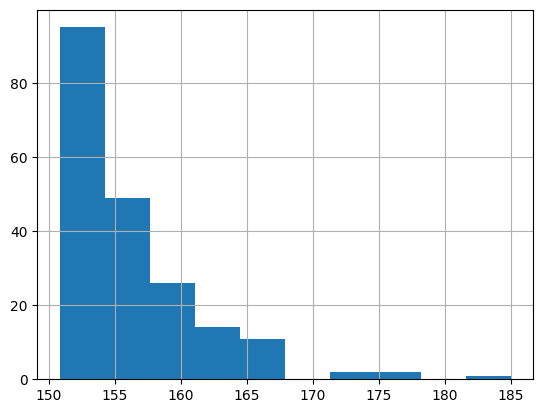

In [78]:
print(pd.Series(predictions).head(200).hist())


In [ ]:
# 100 millones por 200 pozos petrolíferos, 
# 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). 
# Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares 

income = predictions *4500